In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [10]:
ds = xr.open_dataset("mets/input.nc", engine="netcdf4")

In [11]:
ds

<xarray.Dataset>
Dimensions:                (altitude: 23, time: 7)
Coordinates:
  * altitude               (altitude) float32 7.364 7.546 7.732 ... 12.45 12.81
  * time                   (time) timedelta64[ns] 00:00:00 01:00:00 ... 06:00:00
Data variables:
    pressure               (altitude) float32 ...
    temperature            (altitude, time) float32 ...
    relative_humidity_ice  (altitude, time) float32 ...
    shear                  (altitude, time) float32 ...
    w                      (altitude, time) float32 ...

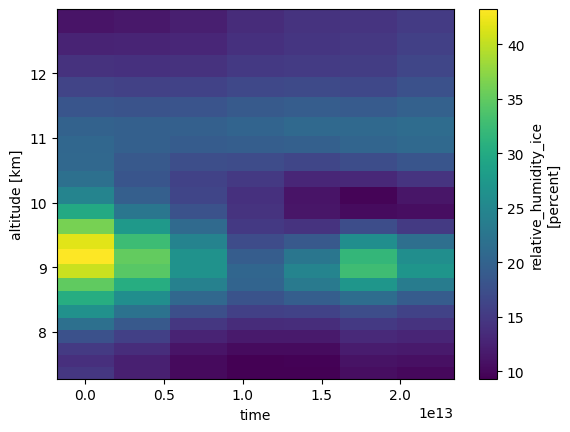

In [14]:
# Convert time coordinate to numeric type for plotting
ds.coords['time'] = ds.coords['time'].astype('float64')
ds["relative_humidity_ice"].plot()